In [1]:
import numpy as np
import pandas as pd
import sys
import os
import itk
code = os.path.abspath('../')
sys.path.append(code)
import src
from src.DELAT_utils import collect_region_stats_paths
import matplotlib.pyplot as plt
from src.analysis import *
from sklearn.linear_model import LinearRegression
from tifffile import imread, imwrite
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
from scipy.stats import linregress
import datetime


In [4]:
base_path = '/nrs/spruston/Boaz/I2'
# base_path = r'X:\Boaz\I2'
meta = pd.read_excel(os.path.join(code, 'paramaters','metadata.xlsx'), 'Metadata', index_col=0)
csv_paths = collect_region_stats_paths(base_path)
region_data = load_region_data(csv_paths)
meta

Data Validation extension is not supported and will be removed


,Cage,AnimalID,Genotype,Pulse,Chase,sex,DOB,Perfusion,Path,Age,Interval,Group,Comment
Number,,,,,,,,,,,,,
1,215258,549057,GluA2-HaloTag line1,Skipped,JF552,female,2024-03-03,2024-09-11,/nrs/spruston/Boaz/I2/2024-09-19_iDISCO_Calibr...,6.400000,0,Zero,Zero day iDISCO
2,216141,550749,GluA2-HaloTag line1,Skipped,JF552,female,2024-03-28,2024-09-11,/nrs/spruston/Boaz/I2/2024-09-19_iDISCO_Calibr...,5.566667,0,Zero,Zero day iDISCO
3,216141,550751,GluA2-HaloTag line1,Skipped,JFX673,female,2024-03-28,2024-09-11,/nrs/spruston/Boaz/I2/2024-09-19_iDISCO_Calibr...,5.566667,0,Zero,Zero day iDISCO
4,216314,551089,GluA2-HaloTag line1,Skipped,JFX673,female,2024-04-02,2024-09-11,/nrs/spruston/Boaz/I2/2024-09-19_iDISCO_Calibr...,5.400000,0,Zero,Zero day iDISCO
5,218600,555600,PSD95-HaloTag,JFX673,JF552,male,2024-06-03,2024-08-28,/nrs/spruston/Boaz/I2/2024-09-09_Compare_iDISC...,2.866667,2,Control,"Problem with Pulse, test for iDISCO"
6,215695,549895,GluA2-HaloTag line1,Skipped,JFX673,female,2024-03-15,2024-09-11,/nrs/spruston/Boaz/I2/20240930_iDISCO_round2/,6.000000,0,Zero,Zero day iDISCO
7,216141,550750,GluA2-HaloTag line1,Skipped,JF552,female,2024-03-28,2024-09-11,/nrs/spruston/Boaz/I2/20240930_iDISCO_round2/,5.566667,0,Zero,Zero day iDISCO
8,216798,552102,GluA2-HaloTag line1,Skipped,JF552,female,2024-04-17,2024-09-11,/nrs/spruston/Boaz/I2/20240930_iDISCO_round2/,4.900000,0,Zero,Zero day iDISCO
9,219292,550746,GluA2-HaloTag line1,JFX673,JF552,female,2024-03-28,2024-08-23,/nrs/spruston/Boaz/I2/20240930_iDISCO_round2/,4.933333,3,Reversal,BM24


In [5]:
csv_paths

{'555600': '/nrs/spruston/Boaz/I2/2024-09-09_Compare_iDISCO_EZCleat_THF/ANM555600_PSD-HT_iDISCO/itk/region_stats.csv',
 '549057': '/nrs/spruston/Boaz/I2/2024-09-19_iDISCO_CalibrationBrains/ANM549057_left_JF552/itk/region_stats.csv',
 '550749': '/nrs/spruston/Boaz/I2/2024-09-19_iDISCO_CalibrationBrains/ANM550749_left_JF552/itk/region_stats.csv',
 '550751': '/nrs/spruston/Boaz/I2/2024-09-19_iDISCO_CalibrationBrains/ANM550751_left_JF673/itk/region_stats.csv',
 '551089': '/nrs/spruston/Boaz/I2/2024-09-19_iDISCO_CalibrationBrains/ANM551089_left_JF673/itk/region_stats.csv',
 '549895': '/nrs/spruston/Boaz/I2/20240930_iDISCO_round2/ANM549895_JFX673/itk/region_stats.csv',
 '550746': '/nrs/spruston/Boaz/I2/20240930_iDISCO_round2/ANM550746_BM24/itk/region_stats.csv',
 '550748': '/nrs/spruston/Boaz/I2/20240930_iDISCO_round2/ANM550748_BM26/itk/region_stats.csv',
 '550750': '/nrs/spruston/Boaz/I2/20240930_iDISCO_round2/ANM550750_JF552/itk/region_stats.csv',
 '552100': '/nrs/spruston/Boaz/I2/20240930

# QC

In [5]:
from src.QC import make_qc
atlas_path = os.path.join(base_path, 'atlas10_hemi.tif')
make_qc(base_path, atlas_path, csv_paths)


PDF report for 555600 already exists. Skipping...
PDF report for 549057 already exists. Skipping...
PDF report for 550749 already exists. Skipping...
PDF report for 550751 already exists. Skipping...
PDF report for 551089 already exists. Skipping...
PDF report for 549895 already exists. Skipping...
PDF report for 550746 already exists. Skipping...
PDF report for 550748 already exists. Skipping...
PDF report for 550750 already exists. Skipping...
PDF report for 552100 already exists. Skipping...
PDF report for 552101 already exists. Skipping...
PDF report for 552102 already exists. Skipping...
PDF report for 552830 already exists. Skipping...
PDF report for 555643 already exists. Skipping...
Processing 550437 at X:\Boaz\I2\20241023_iDisco_Run3_mousecity\ANM550437\itk
read data
generated projections
generated views


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..516].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..516].


combined projections


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..516].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..272].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..516].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..516].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..516].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..272].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..516].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..

PDF report for 550437 created successfully.
Processing 550438 at X:\Boaz\I2\20241023_iDisco_Run3_mousecity\ANM550438\itk
read data
generated projections
generated views


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..516].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..516].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..516].


combined projections


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..272].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..516].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..516].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..516].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..272].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..516].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..516].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..

PDF report for 550438 created successfully.
Processing 550439 at X:\Boaz\I2\20241023_iDisco_Run3_mousecity\ANM550439\itk
read data
generated projections
generated views


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..516].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..516].


combined projections


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..516].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..272].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..516].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..516].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..516].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..272].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..516].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..

PDF report for 550439 created successfully.
PDF report for 551775 already exists. Skipping...
PDF report for 551776 already exists. Skipping...
PDF report for 551777 already exists. Skipping...
Processing 553919 at X:\Boaz\I2\20241023_iDisco_Run3_mousecity\ANM553919_BM28\itk
read data
generated projections
generated views


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..516].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..516].


combined projections


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..516].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..272].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..516].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..516].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..516].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..272].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0..516].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..

PDF report for 553919 created successfully.


In [6]:
def affine_matrix_det(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    # Find the line containing the affine matrix
    for line in lines:
        if line.startswith('(TransformParameters'):
            # Extract the matrix values
            matrix_values = line.split(' ')[1:]  # Split by space and ignore the first element
            matrix_values = [value.strip('()\n') for value in matrix_values]  # Strip extraneous characters
            matrix_values = list(map(float, matrix_values))
            break
    
    # Reshape the matrix values into a 3x3 matrix
    affine_matrix = np.array(matrix_values[:9]).reshape(3, 3)
    
    # Compute the determinant
    determinant = np.linalg.det(affine_matrix)
    
    return affine_matrix, determinant

In [78]:
csv_path

'X:\\Boaz\\I2\\2024-09-09_Compare_iDISCO_EZCleat_THF\\ANM555600_PSD-HT_iDISCO\\itk\\region_stats.csv'

In [ ]:
np.float32

In [7]:
det_dict = {}
for anm, csv_path in csv_paths.items():
    # Get the directory of the CSV file
    # Load the TransformParameters.0.txt file
    p = os.path.dirname(csv_path)
    transform_file_path = os.path.join(p, 'TransformParameters.0.txt')
    affine_matrix , determinant = affine_matrix_det(transform_file_path)
    print(f'Determinant of the affine matrix for {anm}: {determinant}')
    det_dict[anm] = determinant
    meta.loc[meta['AnimalID'].values == int(anm), 'Determinant'] = np.float32(determinant)

Determinant of the affine matrix for 555600: 0.9579414503510694
Determinant of the affine matrix for 549057: 0.9000675969069876
Determinant of the affine matrix for 550749: 0.7950762283057186
Determinant of the affine matrix for 550751: 0.7693490432206241
Determinant of the affine matrix for 551089: 0.8038163421351596
Determinant of the affine matrix for 549895: 0.8705940390269435
Determinant of the affine matrix for 550746: 0.6730413992459294
Determinant of the affine matrix for 550748: 0.6836986425571109
Determinant of the affine matrix for 550750: 0.839069487683652
Determinant of the affine matrix for 552100: 0.7460670360026515
Determinant of the affine matrix for 552101: 0.7109806095790296
Determinant of the affine matrix for 552102: 0.7562989318484848
Determinant of the affine matrix for 552830: 0.778242008130201
Determinant of the affine matrix for 555643: 0.73495952686555
Determinant of the affine matrix for 550437: 0.6216736732099926
Determinant of the affine matrix for 550438:

In [136]:
anm

'555600'

In [139]:
meta

,Cage,AnimalID,Genotype,Pulse,Chase,sex,DOB,Perfusion,Path,Age,Interval,Group,Comment,Determinant
Number,,,,,,,,,,,,,,
1,215258,549057,GluA2-HaloTag line1,Skipped,JF552,female,2024-03-03,2024-09-11,/nrs/spruston/Boaz/I2/2024-09-19_iDISCO_Calibr...,6.400000,0,Zero,Zero day iDISCO,0.900068
2,216141,550749,GluA2-HaloTag line1,Skipped,JF552,female,2024-03-28,2024-09-11,/nrs/spruston/Boaz/I2/2024-09-19_iDISCO_Calibr...,5.566667,0,Zero,Zero day iDISCO,0.795076
3,216141,550751,GluA2-HaloTag line1,Skipped,JFX673,female,2024-03-28,2024-09-11,/nrs/spruston/Boaz/I2/2024-09-19_iDISCO_Calibr...,5.566667,0,Zero,Zero day iDISCO,0.769349
4,216314,551089,GluA2-HaloTag line1,Skipped,JFX673,female,2024-04-02,2024-09-11,/nrs/spruston/Boaz/I2/2024-09-19_iDISCO_Calibr...,5.400000,0,Zero,Zero day iDISCO,0.803816
5,218600,555600,PSD95-HaloTag,JFX673,JF552,male,2024-06-03,2024-08-28,/nrs/spruston/Boaz/I2/2024-09-09_Compare_iDISC...,2.866667,2,Control,"Problem with Pulse, test for iDISCO",0.957941
6,215695,549895,GluA2-HaloTag line1,Skipped,JFX673,female,2024-03-15,2024-09-11,/nrs/spruston/Boaz/I2/20240930_iDISCO_round2/,6.000000,0,Zero,Zero day iDISCO,0.870594
7,216141,550750,GluA2-HaloTag line1,Skipped,JF552,female,2024-03-28,2024-09-11,/nrs/spruston/Boaz/I2/20240930_iDISCO_round2/,5.566667,0,Zero,Zero day iDISCO,0.839069
8,216798,552102,GluA2-HaloTag line1,Skipped,JF552,female,2024-04-17,2024-09-11,/nrs/spruston/Boaz/I2/20240930_iDISCO_round2/,4.900000,0,Zero,Zero day iDISCO,0.756299
9,219292,550746,GluA2-HaloTag line1,JFX673,JF552,female,2024-03-28,2024-08-23,/nrs/spruston/Boaz/I2/20240930_iDISCO_round2/,4.933333,3,Reversal,BM24,0.673041


## JF552

In [88]:
columns = ['Region', 'mean_ch1']
filters = {
    'Group': ['Zero'],  # Include only animals from the 'Zero' group
    'Chase': ['JF552']   # Include only female animals
}
meta_columns = ['AnimalID']
unified_df = get_filtered(meta, filters, region_data, columns, meta_columns)
pivoted_df_552 = unified_df.pivot(index='Region', columns='AnimalID', values=['mean_ch1'])


In [59]:
columns = ['Region', 'mean_ch2']
filters = {
    'Group': ['Zero'],  # Include only animals from the 'Zero' group
    'Chase': ['JFX673']   # Include only female animals
}
meta_columns = ['AnimalID']
unified_df = get_filtered(meta, filters, region_data, columns, meta_columns)
pivoted_df_673 = unified_df.pivot(index='Region', columns='AnimalID', values=['mean_ch2'])


In [60]:
pivoted_df_673

mean_ch2                                                    
AnimalID        549895       550751       551089       552100       555643
Region                                                                    
1          1724.940704  1924.899627  2111.123160  1823.251490  2088.930614
2          2107.238101  2639.169324  2625.309118  2099.602412  2935.403067
6           604.016429   731.109178   795.724093   586.134448   657.479130
7           787.618077   994.455866  1019.655073   761.903321   943.919219
9          3360.983813  4602.336943  4811.012262  3726.198028  4304.112414
...                ...          ...          ...          ...          ...
607344850  1516.361156  1731.305437  2013.368861  1860.911206  1822.578740
607344854  1392.886890  1814.169795  1954.806922  1706.401101  1735.543838
607344858  1444.253613  1785.732358  2002.959731  1762.601371  1801.637790
607344862  1420.265283  1901.461518  1909.728950  1864.739121  1920.034445
614454277  1137.397488  1519.447022  1633.200798  1268.581758  1330.657485

[687 rows x 5 columns]

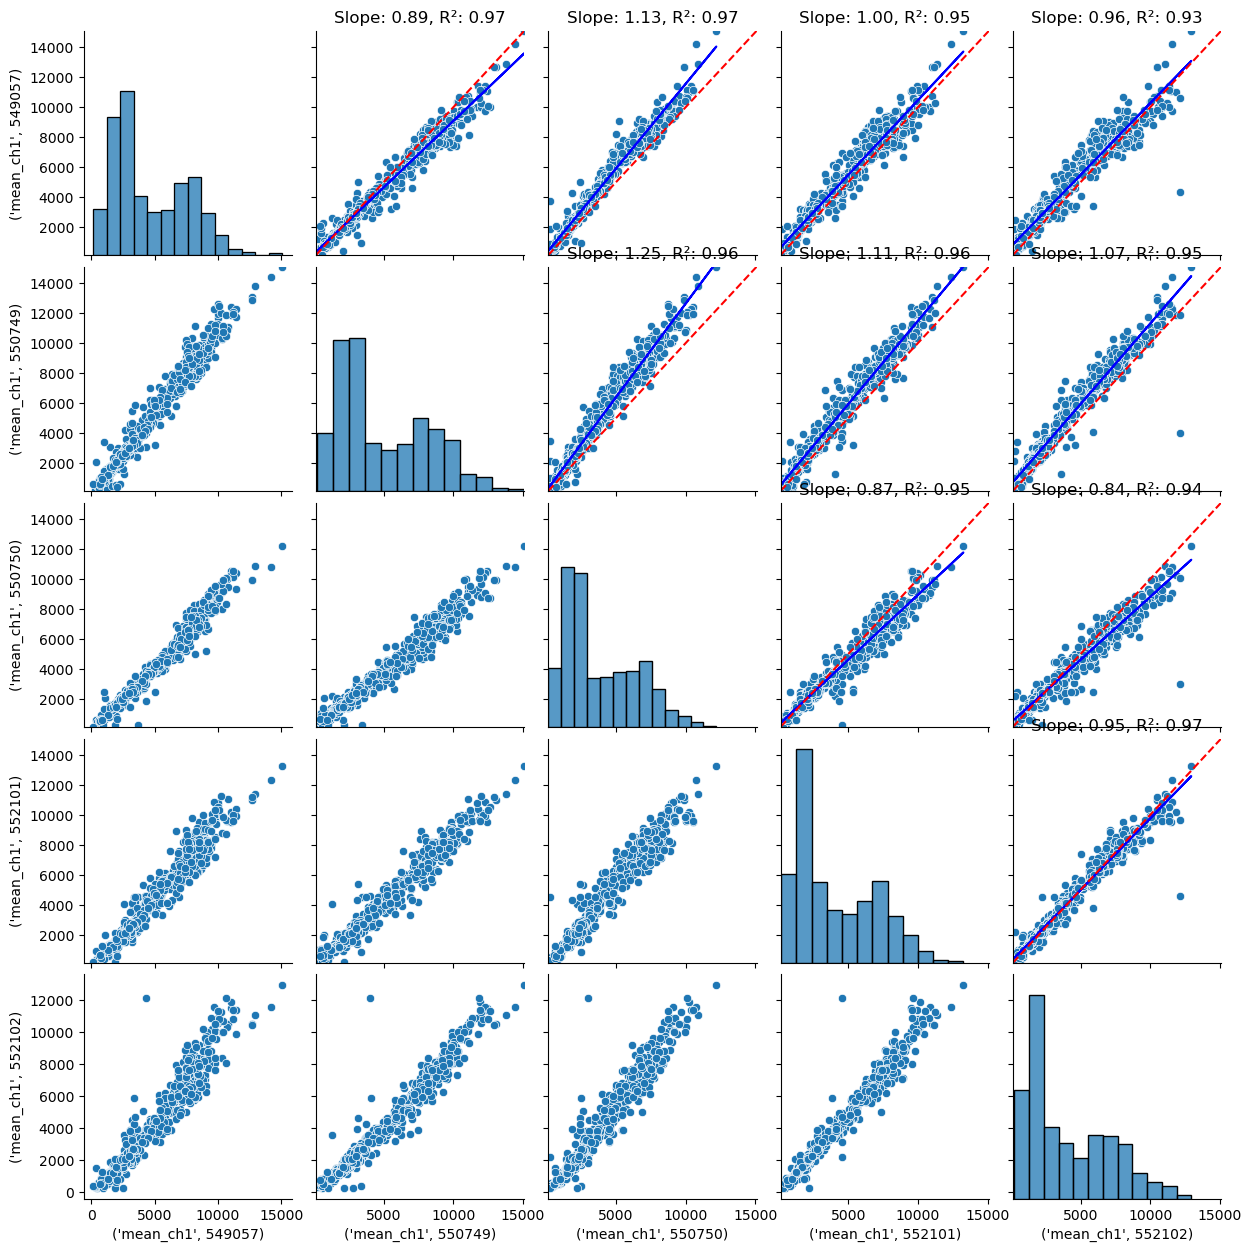

In [57]:

# Assuming pivoted_df is already defined or loaded
# pivoted_df = pd.read_csv('path/to/your/csv')  # Example of loading a DataFrame



# Call the function with pivoted_df
create_custom_pair_plot(pivoted_df)

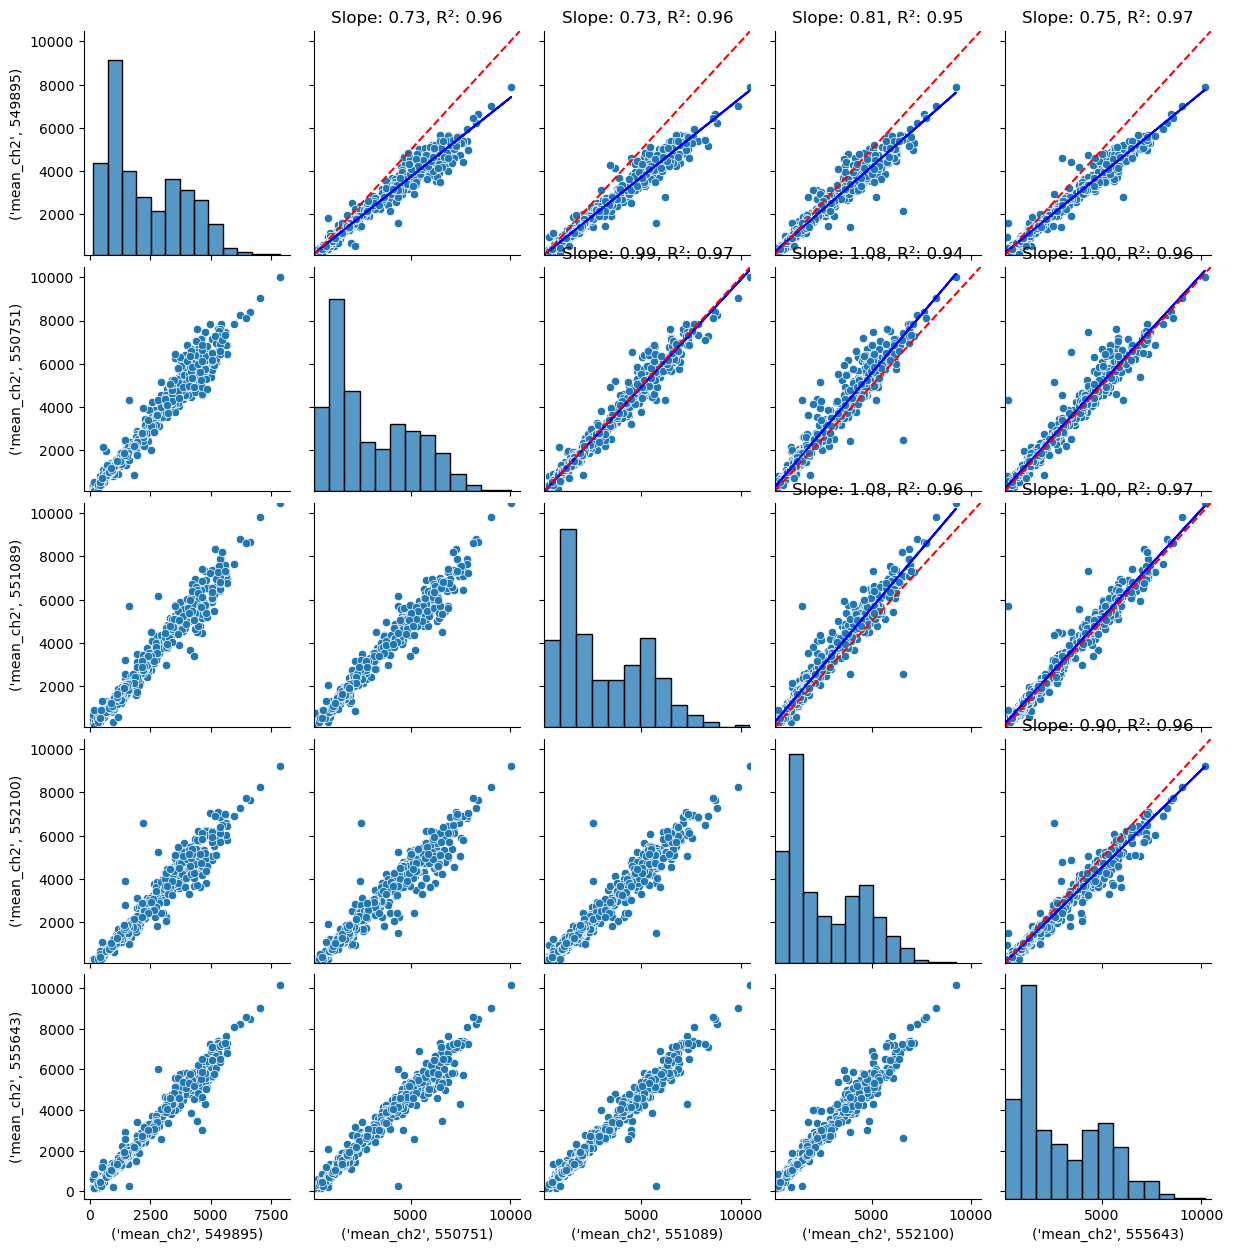

In [61]:

create_custom_pair_plot(pivoted_df_673)

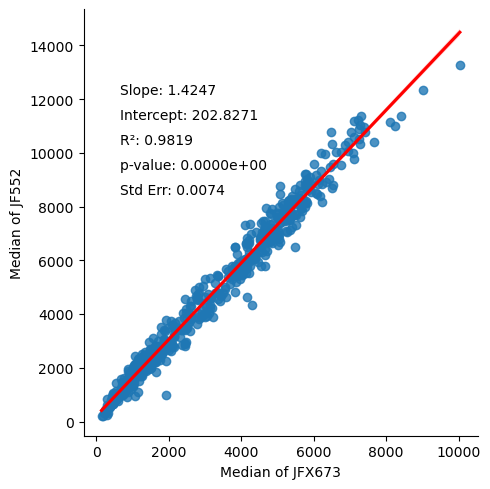

In [93]:
median_673 = pivoted_df_673.median(axis=1)

# Calculate the median across rows for pivoted_df_552
median_552 = pivoted_df_552.median(axis=1)

# Match the indices
common_indices = median_673.index.intersection(median_552.index)
median_673 = median_673.loc[common_indices]
median_552 = median_552.loc[common_indices]

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Median_673': median_673,
    'Median_552': median_552
})

slope, intercept, r_value, p_value, std_err = linregress(median_673, median_552)
# Plot the scatter plot with linear fit
sns.lmplot(x='Median_673', y='Median_552', data=plot_df, ci=95, line_kws={'color': 'red'})
plt.xlabel('Median of JFX673')
plt.ylabel('Median of JF552')


# Display fit parameters
plt.figtext(0.25, 0.8, f'Slope: {slope:.4f}', fontsize=10)
plt.figtext(0.25, 0.75, f'Intercept: {intercept:.4f}', fontsize=10)
plt.figtext(0.25, 0.7, f'R²: {r_value**2:.4f}', fontsize=10)
plt.figtext(0.25, 0.65, f'p-value: {p_value:.4e}', fontsize=10)
plt.figtext(0.25, 0.6, f'Std Err: {std_err:.4f}', fontsize=10)

plt.show()

In [97]:
today = datetime.datetime.today().strftime('%Y-%m-%d')
calibration_file = f'calibration_values_{today}.txt'

with open(calibration_file, 'w') as file:
    file.write(f'Slope: {slope:.4f}\n')
    file.write(f'Intercept: {intercept:.4f}\n')

print(f'Calibration values saved to {calibration_file}')

Calibration values saved to calibration_values_2024-10-17.txt
